### Building a basic chatbot

In [3]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [4]:
class State(TypedDict):
    # messages have a type of list[str] and add the messages to the state
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)


In [5]:
graph_builder

In [7]:
import os
from dotenv import load_dotenv

load_dotenv()

True

In [8]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

llm=ChatGroq(model="llama-3.1-8b-instant")

In [9]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x109e72ba0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x10a54b5c0>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [12]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

In [13]:
graph_builder = StateGraph(State)
graph_builder.add_node("llmchatbot", chatbot)

## START --> llmchatbot --> END
graph_builder.add_edge(START, "llmchatbot")
graph_builder.add_edge("llmchatbot", END)

# compile the graph
graph = graph_builder.compile()

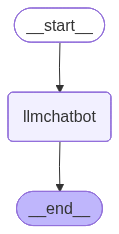

In [15]:
# visualize the graph
from IPython.display import display, Image

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    pass

In [17]:
graph.invoke({"messages": ["Hello, how are you?"]})

{'messages': [HumanMessage(content='Hello, how are you?', additional_kwargs={}, response_metadata={}, id='fd6f967d-5f5b-405e-94dc-a291f9b26c4e'),
  AIMessage(content="I'm functioning properly, thank you for asking. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 41, 'total_tokens': 59, 'completion_time': 0.024852327, 'prompt_time': 0.00282941, 'queue_time': 0.100245303, 'total_time': 0.027681737}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_6b5c123dd9', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--e0ef2ab3-b64a-4ac4-822b-1d9d2b2acd1c-0', usage_metadata={'input_tokens': 41, 'output_tokens': 18, 'total_tokens': 59})]}

In [18]:
for event in graph.stream({"messages": "Hi, how are you?"}):
    for value in event.values():
        print(value["messages"][-1].content)

I'm doing well, thank you for asking. I'm a large language model, so I don't have emotions or feelings like humans do, but I'm functioning properly and ready to assist you with any questions or tasks you may have. How can I help you today?
